In [22]:
import numpy as np
from scipy.fftpack import fft2, ifft2
from numpy.fft import fftshift, ifftshift
from PIL import Image
import matplotlib.pyplot as plt

# Convertir la imagen a b&n
imagen = np.array(Image.open('imagen1.png').convert('L'))
img1 = imagen.copy()

# Ejercicio 1

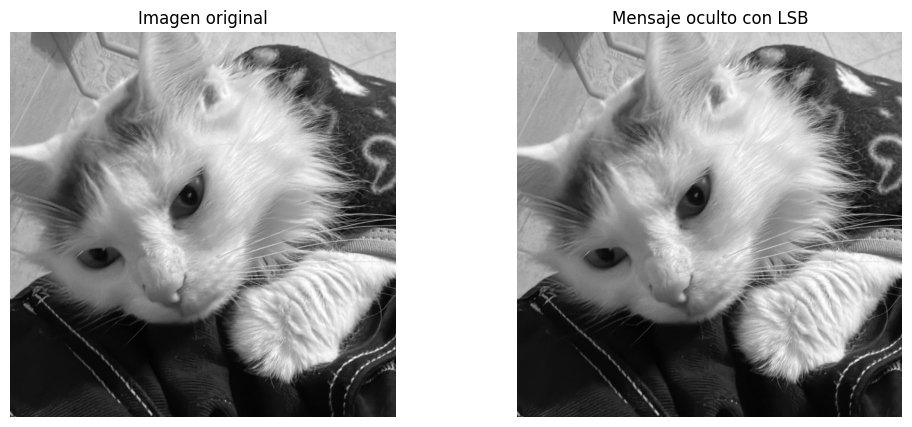

Promoción o muerte


In [23]:
# texto (msj) -> ascii y ascii -> binario
msj = "Promoción o muerte"

def texto_a_binario(msj):
  # Marcar fin de mensaje con &
    msj += '&'
    binario = ''
    
    # Cada letra del mensaje se pasa a ascii con ord() y luego a binario con format()
    for letra in msj:
        ascii = ord(letra)
        bin8 = format(ascii,'08b')
        binario += bin8
        
    return binario

mensaje = texto_a_binario(msj)
x, y = imagen.shape

# Para tratar la matriz de pixeles como array (despues hacemos reshape)
imagen = imagen.flatten()
rango = len(mensaje)

# Si el mensaje entra en la imagen
if len(mensaje) <= len(imagen):
    for k in range(rango):
        val = imagen[k]
        val = bin(val)
        val_nuevo = val[:-1] + mensaje[k]
        imagen[k] = int(val_nuevo, 2)
else:
    print("El mensaje es demasiado largo")

imagen = imagen.reshape((x,y))

import matplotlib.pyplot as plt  # Reimporta correctamente

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img1, cmap = "gray")
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imagen, cmap = "gray")
plt.title("Mensaje oculto con LSB")
plt.axis('off')
plt.show()

# Creando archivo estego
img_guardar = Image.fromarray(imagen) # esto porque arriba leimos la imagen como array
img_guardar.save("imagenEstego.png")

def decodificar_mensaje(imagen):
    img = np.array(Image.open(imagen).convert('L'))
    img = img.flatten()
    msj_decodificado = ""
    k = 0
    fin = False
    
    while (not fin and k+8<=len(img)):
    # k va contando los bits que se leen. Si la img tiene menos de 8, no los puede leer
        bits = ""
        for i in range(8):
            bits += str(img[k] & 1)
            k += 1
        letra = chr(int(bits, 2))
        
        if letra == '&':
            fin = True
        else:
            msj_decodificado += letra
        
    return msj_decodificado

mensajeco = decodificar_mensaje("imagenEstego.png")
print(mensajeco)

# Ejercicio 2

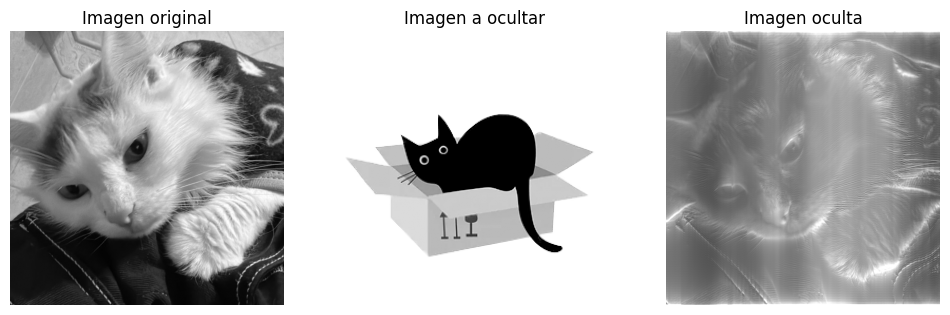

In [ ]:
def img_a_bin(img):
    return np.unpackbits(img.astype(np.uint8)).astype(np.uint8)

img3 = np.array(Image.open("imagen3.png").convert("L"))

# devuelve array con la imagen en binario
img3_bin = img_a_bin(img3)

fft_im1 = fft2(img1)

def cambiar_signo (fimag1, secreto):
    indx=0
    long = len(secreto)
    fila, col = img1.shape
    
    for i in range(fila):
        for k in range(col):
            
            # aislo parte real de imaginaria
            real = np.real(fimag1[i,k])
            imag = np.imag(fimag1[i,k])
              
            if (secreto[indx] and indx<long):
                # si tengo que ocultar un 1 y real es positivo, cambio
                if (real>0):
                    real = real*(-1)
                    indx+=1
                    
            elif (secreto[indx]==0 and indx<long):
                # si tengo que ocultar un 0 y real es negativo, cambio
                if (real<0):
                    real = real*(-1)
                    indx+=1
    
            # mismo proceso para negativo
            if (secreto[indx] and indx<long):
                # si tengo que ocultar un 1 e imag es positivo, cambio
                if (imag>0):
                    imag = imag*(-1)
                    indx+=1
                    
            elif (secreto[indx]==0 and indx<long):
                # si tengo que ocultar un 0 e imag es negativo, cambio
                if (imag<0):
                    imag = imag*(-1)
                    indx+=1
                
            fimag1[i][k]=real+1j*imag
            if indx==long: break
            
    return fimag1

#583200 -> img1
#540800 -> datos

rta = cambiar_signo(fft_im1, img3_bin)
# tiene comp img y real
rta1=rta.copy()

rta = np.abs(ifft2(rta))

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen original")
plt.axis('off')


plt.subplot(1,3,2)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen a ocultar")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(rta, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen oculta")
plt.axis('off')

plt.show()



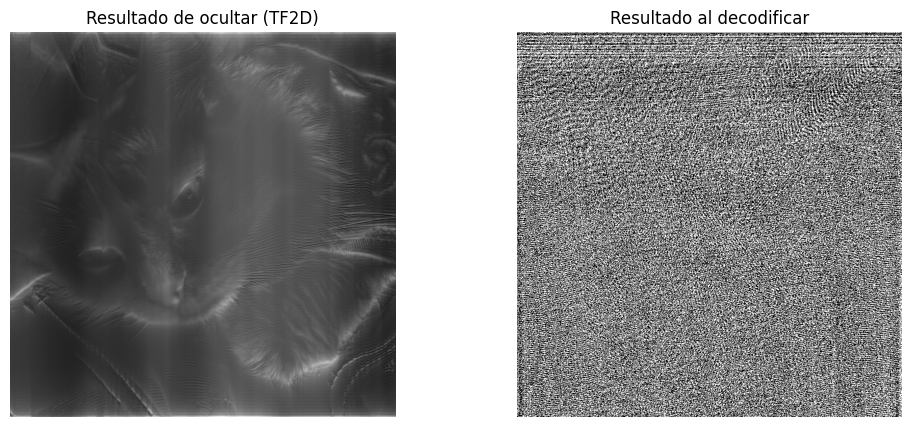

In [125]:
def decod_fft2 (imgcodif):
    fila, col = imgcodif.shape
    it_0 = 0
    tam = (fila*col)
    #291600
    
    imgdecodif=np.zeros(tam, dtype=np.uint8)

    for i in range(fila):
        for k in range(col):
            real = np.real(imgcodif[i,k])
            imag = np.imag(imgcodif[i,k])    
            if real<0:
               imgdecodif[it_0]=1
            else:
               imgdecodif[it_0]=0
               
            it_0+=1
                   
            if imag<0:
               imgdecodif[it_0]=1
            else:
               imgdecodif[it_0]=0
               
            it_0+=1
            if it_0==tam: break
            
        if it_0==tam: break       
    return np.array(imgdecodif, dtype=np.uint8)

def bits_a_img(bits, forma):
    filas=forma[0]
    cols=forma[1]
    total = filas * cols

    if len(bits) < total:
        # pad agrega padding al array para poder hacer reshape
        bits = np.pad(bits, (0, total - len(bits)), constant_values=0)
    else:
        bits = bits[:total]
    return bits.reshape(forma)

# me devuelve arrays de 1 y 0 con la imagen oculta
imgdecod = decod_fft2(rta1)
img_fin = bits_a_img(imgdecod, rta1.shape)



plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(rta, cmap='gray')
plt.title("Resultado de ocultar (TF2D)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_fin, cmap='gray')
plt.title("Resultado al decodificar")
plt.axis('off')
plt.show()

# Ejercicio 3

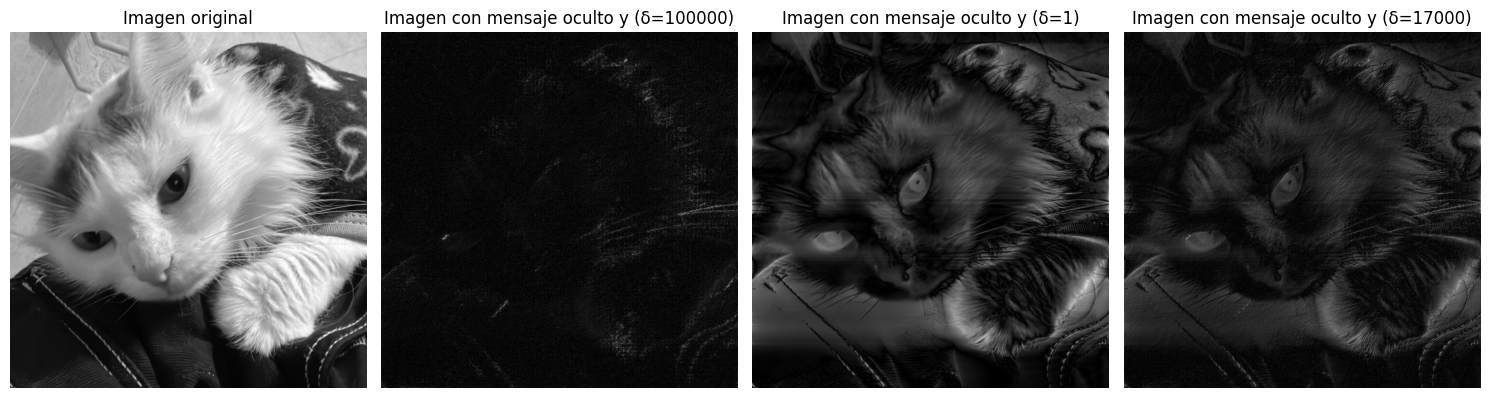

In [ ]:
def modificar_coeficientes(fft_img, mensaje, delta):
    fft_mod = fft_img.copy()
    fila, cols = fft_mod.shape
    index = 0
    total_bits = len(mensaje)
    
    for i in range(fila):
        for j in range(cols):
            if index >= total_bits:
                break
            
            # trabajo solo en el primer cuadrante y después hago el conjugado
            if (i < fila//2 and j < cols//2):
                # aislo parte real
                a = fft_mod[i, j].real
                
                # guardo el signo de a en signo_a
                if (a >= 0): signo_a = 1 
                else: signo_a= -1
                    
                # fórmula para q=abs(round(a/δ))
                q_a = np.abs(np.round(a / delta))
                
                if (index < total_bits):
                    bit = mensaje[index]
                    # si tengo que ocultar 1 y q par, q++
                    # si tengo que ocultar 0 y q impar, q++
                    if (bit == 1 and q_a % 2 == 0) or (bit == 0 and q_a % 2 == 1):
                        q_a += 1
                        
                    # a'=signo.q_a.delta    
                    a_nuevo = signo_a * q_a * delta
                    # como ya oculté un bit de mensaje, itero
                    index += 1
                else:
                    # si ya terminé de ocultar el mensaje, no modifico el dato orig.
                    a_nuevo = a
                
                
# tengo que volver a verificar el index, porque puede que al terminar de asignar el mensaje en la parte real me salga de rango
                
                if (index < total_bits):
                    # aislo la parte imaginaria
                    b = fft_mod[i, j].imag
                    
                    # guardo el signo de b en signo_b
                    if (b >= 0): signo_b = 1 
                    else: signo_b= -1
                        
                    # fórmula para q=abs(round(b/δ))
                    q_b = np.abs(np.round(b / delta))
                    
                    bit = mensaje[index]
                    
                    # si tengo que ocultar 1 y q par, q++
                    # si tengo que ocultar 0 y q impar, q++
                    if (bit == 1 and q_b % 2 == 0) or (bit == 0 and q_b % 2 == 1):
                        q_b += 1
                        
                    # b'=signo.q_b.delta  
                    b_nuevo = signo_b * q_b * delta
                    index += 1
                else:
                    b_nuevo = fft_mod[i, j].imag
                
                # si terminé de modificar, guardo el bit como a'+b'j
                fft_mod[i, j] = a_nuevo + 1j * b_nuevo
    
    # Mantener simetría conjugada
    for i in range(fila):
        for j in range(cols):
            if ((i >= fila//2) or (j >= cols//2)):
                if i != 0:
                    conj_i = fila - i - 1
                else: conj_i = 0
                if j != 0:
                    conj_j = cols - j - 1
                else: conj_j = 0
                
                # np.conjugate me devuelve el conjugado i-j de i+j
                fft_mod[i, j] = np.conjugate(fft_mod[conj_i, conj_j])
    
    return fft_mod

# <<< FIN DE FUNCIONES >>>

# convierto imagen a array con binarios
bits_msg = img_a_bin(img3)

# Padding si es necesario
padding = (8 - len(bits_msg) % 8) % 8
bits_msg_padded = np.concatenate([bits_msg, np.zeros(padding, dtype=np.uint8)])


# tft2 de la imagen portadora y aplicar shift, de lo contrario obtengo cruz oscura en medio
# shift agarra las frecuencias más cercanas a 0 y las deja cerca del centro
fft_img = fftshift(fft2(img1.astype(float)))

# delta muy alto vs delta cercano a 0
delta1 = 100000
delta2 = 17000
delta3 = 1

# CASO 1: DELTA GRANDE
fft_mod1 = modificar_coeficientes(fft_img, bits_msg, delta1)
# aplico inversa de fft e inversa de fft shift
img_mod1 = np.abs(ifft2(ifftshift(fft_mod1)))

# CASO 2: DELTA CHIQUITO
fft_mod2 = modificar_coeficientes(fft_img, bits_msg, delta2)
img_mod2 = np.abs(ifft2(ifftshift(fft_mod2)))

# CASO 3: DELTA=1
fft_mod3 = modificar_coeficientes(fft_img, bits_msg, delta3)
img_mod3 = np.abs(ifft2(ifftshift(fft_mod3)))

# PLOTEO
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_mod1, cmap='gray')
plt.title(f"Imagen con mensaje oculto y (δ={delta1})")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_mod3, cmap='gray')
plt.title(f"Imagen con mensaje oculto y (δ={delta3})")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_mod2, cmap='gray')
plt.title(f"Imagen con mensaje oculto y (δ={delta2})")
plt.axis('off')

plt.tight_layout()
plt.show()

# NOTA: A MEDIDA QUE SE AUMENTA DELTA SE VA PERDIENDO INFORMACIÓN, SE ELIMININAN FRECUENCIAS ALTAS
# SI DELTA ES CERCANO A 0, LOS COEFICIENTES NO CAMBIAN MUCHO Y SE PARECE DEMASIADO A IMAGEN ORIGINAL


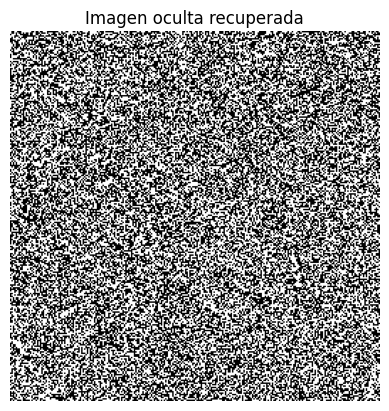

In [ ]:
def desc_oculta(fft_mod, delta):
    bits = []
    fila, cols = fft_mod.shape
    for i in range(fila):
        for j in range(cols):
            if ((i < fila // 2) and (j < cols // 2)):
                a = fft_mod[i, j].real
                b = fft_mod[i, j].imag

                q_a = int(np.round(np.abs(a) / delta))
                q_b = int(np.round(np.abs(b) / delta))

                bits.append(q_a % 2)
                bits.append(q_b % 2)

    return np.array(bits, dtype=np.uint8)

def bits_a_img(bits, forma):
    filas=forma[0]
    cols=forma[1]
    total = filas * cols

    if len(bits) < total:
        # pad agrega padding al array para poder hacer reshape
        bits = np.pad(bits, (0, total - len(bits)), constant_values=0)
    else:
        bits = bits[:total]
    return bits.reshape(forma)


bits_rec = desc_oculta(fft_mod3, 1)
img_rec = bits_a_img(bits_rec, img3.shape)


plt.imshow(img_rec, cmap='gray')
plt.title("Imagen oculta recuperada")
plt.axis('off')
plt.show()
